# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [3]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [37]:
import math
def Ridder(f, a , b, tol = 1e-8, maxiter=100):
    '''Calcula la raíz de una función dada usando una correción exponencial
    parametros:
    f: función
    a: punto (ingresado por el usuario)
    b: punto (ingresado por el usuario)
    tol: tolerancia(establecida pero puede modicarse)
    maxiter: número de iteraciones (establecida pero puede modicarse)
    Retorna:
    La raíz calculada y el número de iteraciones realizado'''

    fa = f(a) #defnimos fa y fb
    fb = f(b)

    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")  #si no se cumple la condición, arroja un error, if s==0:

    for i in range(1, maxiter):
        m = (a + b)/2 #calculamos m
        fm = f(m) #definimos fm

        s= math.sqrt(fm**2-fa*fb) #definimos s
        if s == 0:
            raise ValueError("la raíz no puede estimarse en esta iteración.")
        x = m + (m - a) * fm / s * np.sign(fa - fb)
        fx = f(x)

        if abs(fx) < tol:
            return x, i + 1

        if fm * fx < 0: #actualizamos el intervalo
            a = m
            fa = fm
            b = x
            fb = fx
        elif fa * fx < 0: #actualizamos el intervalo
            b = x
            fb = fx
        else:
            a = x
            fa = fx

    return x, maxiter #si no converge, retornamos la última estimación


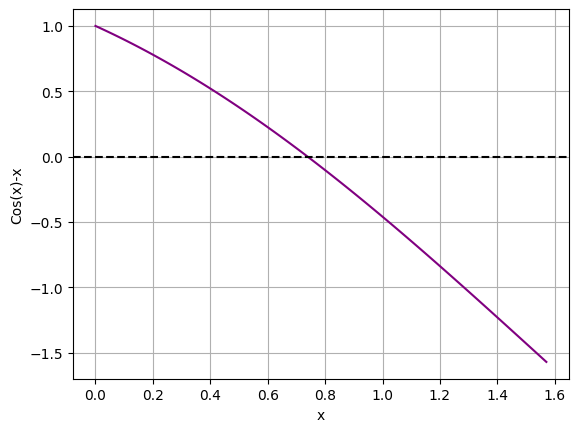

In [7]:
#definimos cos(x)-x
def f(x):
  return np.cos(x)- x

#graficamos
x = np.linspace(0, np.pi/2, 100)
plt.plot(x, f(x), color='purple')
plt.xlabel('x')
plt.ylabel('Cos(x)-x')
plt.grid()
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [8]:
#para el dataframe
df = pd.DataFrame({'x': x, 'f(x)': f(x)})

print(df[(df['f(x)']< 0.1) & (df['f(x)'] > -0.1)]) #para filtrar los valores (cercanos a cero)
#observemos que entre el valor 0.729865 y 0.745732 hay un cambio de signo en f(x)
#por lo que la raiz debe encontrarse en este intervalo

           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


In [23]:
#calculemos la raiz utilizando el método de Ridder y comparemos con biseccion y secante:
a = -np.pi/2
b = np.pi/2

from scipy.optimize import bisect, newton #importamos los métodos

raiz_ridder = Ridder(f, a, b)
raiz_biseccion = bisect(f, a, b)
raiz_secante = newton(f, a)

print(f"Método Ridder: raíz = {raiz_ridder:.10f}")
print(f"Método Bisección: raíz = {raiz_biseccion:.10f}")
print(f"Método Secante: raíz = {raiz_secante:.10f}")
#podemos observar que en este caso, los tres métodos tienen una buena convergencia y una aproximación muy precisa, los tres dan el mismo resultado usando 10 decimales.

Método Ridder: raíz = 0.7390851332
Método Bisección: raíz = 0.7390851332
Método Secante: raíz = 0.7390851332


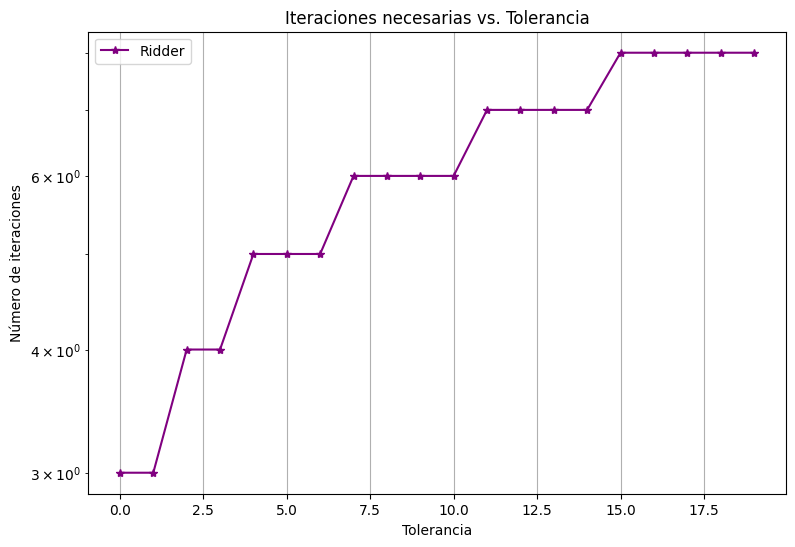

In [57]:
tolerancias = np.logspace(-1, -20, 20)
N_ridder = []

#calculamos el número de iteraciones para el método y la tolerancia
for tol in tolerancias:
    raiz_ridder, iter_ridder = Ridder(f, a, b, tol=tol)
    N_ridder.append(iter_ridder)

#graficamos con semilogy
plt.figure(figsize=(9, 6))
plt.semilogy( N_ridder, '*-', color='purple', label='Ridder')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Iteraciones necesarias vs. Tolerancia')
plt.legend()
plt.grid(True)
plt.show()

#podemos observar que con una tolerancia mas pequeña se necesitan más iteracciones, sin embargo,
#el número de iteracciones no es muy grande, por lo que podemos decir que el método de Ridder converge rapidamente.

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





In [68]:
#Para la parte A:
# definimos las variables
n = 1.52  #vidrio crown
A_grados = 60  #angulo del prisma en grados
A = np.deg2rad(A_grados)  #convertimos a radianes

#funcion para la derivada
def d_deltha(theta_grados):
    '''
    Calcula la derivada del ángulo de desviación total con respecto al ángulo de incidencia

    Parámetros:
    theta_grados: Ángulo de incidencia en grados.

    Retorna:
    Valor de la derivada.
    '''
    theta_i = np.deg2rad(theta_grados)  #ya que debemos convertir a radianes
    theta_r= np.arcsin(np.sin(theta_i)/n)

    return 1-((np.cos(theta_i)*np.cos(A-theta_r))/(np.cos(theta_r)*(np.sqrt(1-(n**2)*(np.sin(A-theta_r))**2))))


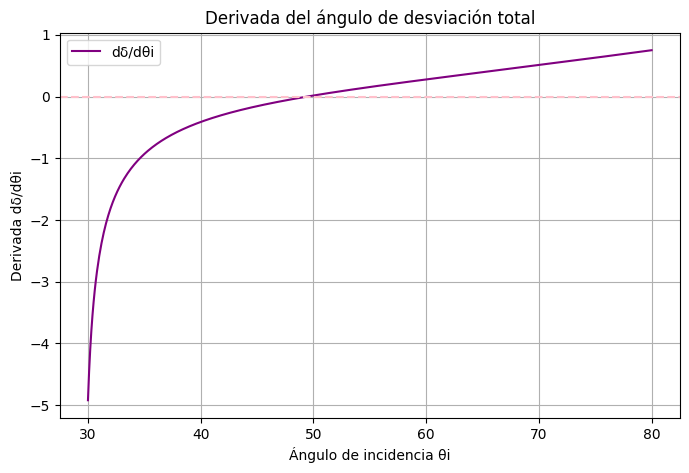

In [69]:
theta_vals = np.linspace(30, 80, 500) #creamos los valores de theta
d_vals = [d_deltha(theta) for theta in theta_vals] #evaluamos los valores de theta para graficar

#para graficar la derivada
plt.figure(figsize=(8, 5))
plt.plot(theta_vals, d_vals, color = 'purple', label="dδ/dθi")
plt.axhline(0, color='pink', linestyle='--')
plt.xlabel("Ángulo de incidencia θi")
plt.ylabel("Derivada dδ/dθi")
plt.title("Derivada del ángulo de desviación total")
plt.grid(True)
plt.legend()
plt.show()

In [70]:
#para el ángulo de desviación mínimo:

min_newton = newton(d_deltha, x0 = 30)
min_secante = newton(d_deltha, x0 = 30, x1 = 50)

print(f'El ángulo de desviación mínimo usando el método de Newton Raphson es:{min_newton}')
print(f'El ángulo de desviación mínimo usando el método de la Secante es:{min_secante}')

El ángulo de desviación mínimo usando el método de Newton Raphson es:49.46419788868342
El ángulo de desviación mínimo usando el método de la Secante es:49.46419788868342


In [72]:
#Para la parte B:
#debemos definir una función tal que sin(A - θr) - 1/n, para encontrar su raíz
def angulo_critico(theta_grados):
    '''
    Función cuyo cero corresponde al ángulo critico donde ocurre reflexión interna total

    Parámetros:
    theta_grados: ángulo de incidencia (en grados)

    Retorna:
    f(theta) = sin(A - arcsin(sin(theta)/n)) - 1/n
    '''
    theta_rad = np.deg2rad(theta_grados)
    theta_r = np.arcsin(np.sin(theta_rad) / n) #usamos que θr = arcsin(sin(θi) / n)
    return np.sin(A - theta_r) - 1/n


In [74]:
theta_critico = bisect(angulo_critico, -30, 70) #utilizamos el método de Bisección para resolver
print(f"Ángulo crítico θ (reflexión interna total): {theta_critico:.4f} grados")

Ángulo crítico θ (reflexión interna total): 29.4302 grados
